<a href="https://colab.research.google.com/github/Mayankkcode/ME217-IDA_Miniproject/blob/main/IDA_MINIPROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
import os

# Function to calculate time-domain features
def calculate_time_domain_features(data):
    features = {
        'mean': np.mean(data),
        'std_dev': np.std(data),
        'skewness': skew(data),
        'kurtosis': kurtosis(data),
        'rms': np.sqrt(np.mean(np.square(data)))
    }
    return features

# Function to calculate frequency-domain (FFT) features
def calculate_fft_features(data, sampling_rate=1000):
    n = len(data)
    fft_result = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_magnitude = np.abs(fft_result)

    positive_freq = fft_freq[:n//2]
    positive_magnitude = fft_magnitude[:n//2]

    fft_features = {
        'dominant_freq': positive_freq[np.argmax(positive_magnitude)],
        'peak_magnitude': np.max(positive_magnitude),
         'average_magnitude': np.mean(positive_magnitude),
        'std_magnitude': np.std(positive_magnitude)

    }
    return fft_features

# Directory structure for the feature outputs
directories = {
    "Healthy_3_0.xlsx": "extracted_features",
    "BallFault_0007.xlsx": "extracted_features_1",
    "Ballfault_00028.xlsx": "extracted_features_2",
    "Innerfault_0007.xlsx": "extracted_features_3",
    "Innerfault_00028.xlsx": "extracted_features_4",
    "Testing_file1.xlsx": "extracted_features_test"
}

# Process each file and extract features
for file_name, output_dir in directories.items():
    # Create output directories
    output_dir_0kw = os.path.join(output_dir, '0kw')
    output_dir_3kw = os.path.join(output_dir, '3kw')
    os.makedirs(output_dir_0kw, exist_ok=True)
    os.makedirs(output_dir_3kw, exist_ok=True)

    # Load and clean the file
    df = pd.read_excel(file_name)
    df_cleaned = df.dropna()
    # Iterate through each file and extract features
for file_name, output_dir in directories.items():
    # Create output directories
    output_dir_0kw = os.path.join(output_dir, '0kw')
    output_dir_3kw = os.path.join(output_dir, '3kw')
    os.makedirs(output_dir_0kw, exist_ok=True)
    os.makedirs(output_dir_3kw, exist_ok=True)

    # Load the file
    df = pd.read_excel(file_name)

    # Identify the rows with missing values
    missing_rows = df[df.isnull().any(axis=1)]

    # Drop rows with missing values
    df_cleaned = df.dropna()

    # Calculate features for all columns
    for idx, column in enumerate(df_cleaned.columns, start=1):
        sensor_data = df_cleaned[column]  # Access each column of data

        # Time-domain features
        time_domain_features = calculate_time_domain_features(sensor_data)

        # FFT features
        fft_features = calculate_fft_features(sensor_data)

        # Combine both sets of features
        combined_features = {**time_domain_features, **fft_features, 'column': column}

        # Convert to a DataFrame for the current column
        features_df = pd.DataFrame([combined_features])

        # Format the index with leading zeros
        formatted_index = str(idx).zfill(len(str(len(df_cleaned.columns))))

        # Save features to the respective subdirectory based on the column name
        if column.startswith("0kw"):
            feature_file_path = os.path.join(output_dir_0kw, f"{formatted_index}_{column}_features.csv")
        elif column.startswith("3kw"):
            feature_file_path = os.path.join(output_dir_3kw, f"{formatted_index}_{column}_features.csv")
        else:
            continue  # Skip columns not starting with 0kw or 3kw

        # Save the features to a CSV file
        features_df.to_csv(feature_file_path, index=False)

    # Summary message
    print(f"Features for {file_name} saved in directory: {output_dir}")






Features for Healthy_3_0.xlsx saved in directory: extracted_features
Features for BallFault_0007.xlsx saved in directory: extracted_features_1
Features for Ballfault_00028.xlsx saved in directory: extracted_features_2
Features for Innerfault_0007.xlsx saved in directory: extracted_features_3
Features for Innerfault_00028.xlsx saved in directory: extracted_features_4
Features for Testing_file1.xlsx saved in directory: extracted_features_test


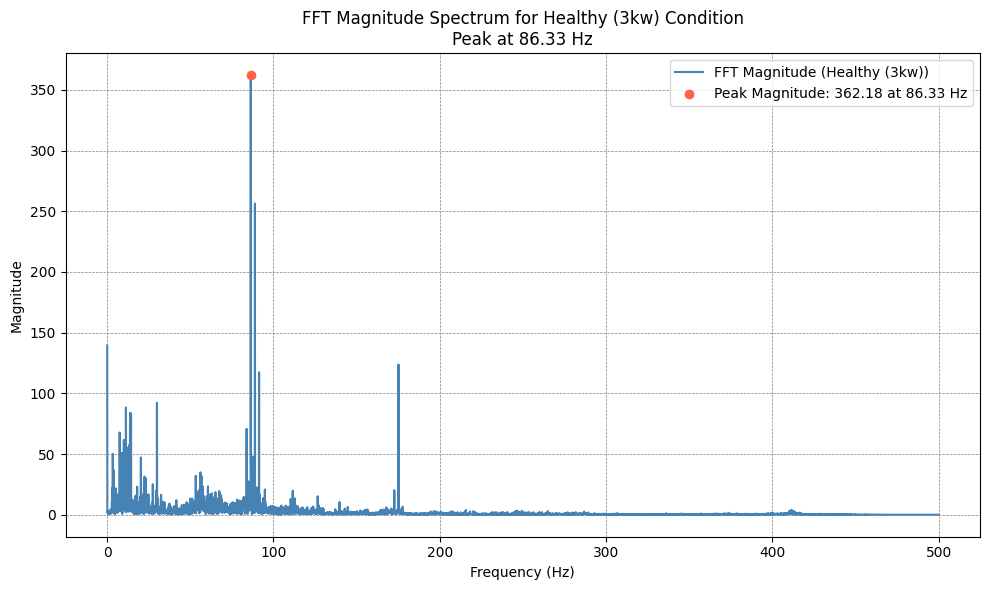

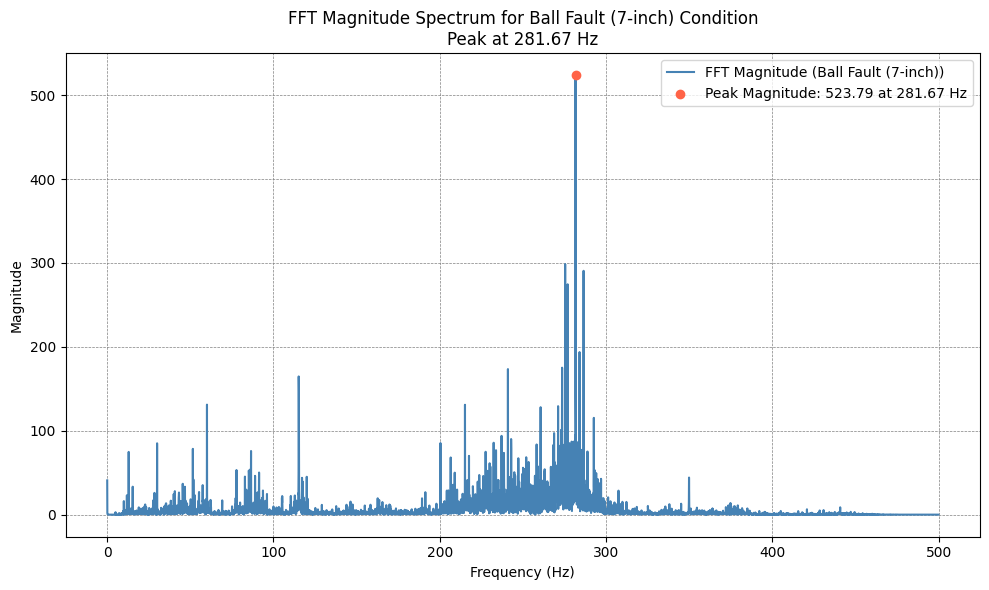

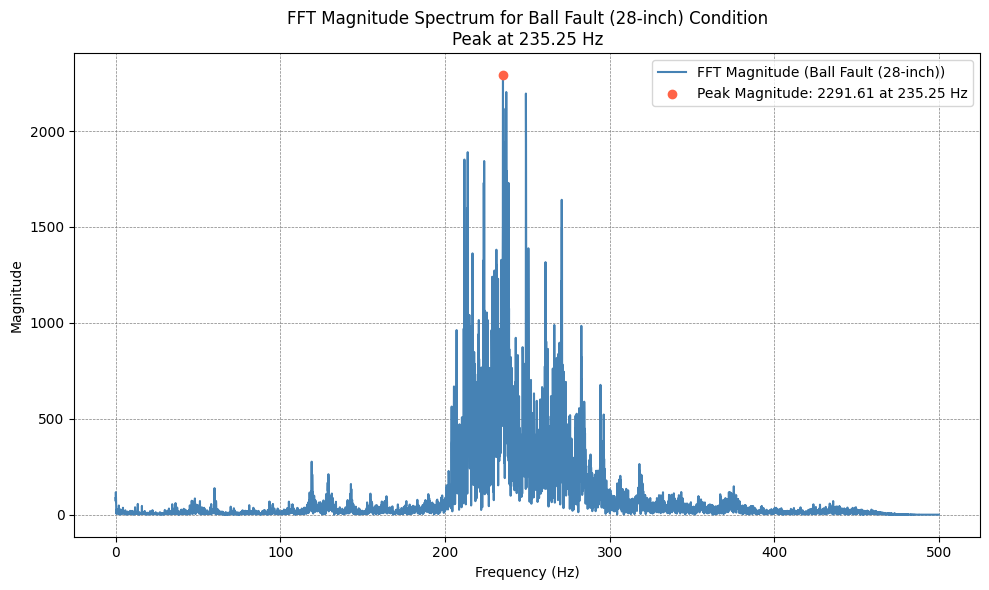

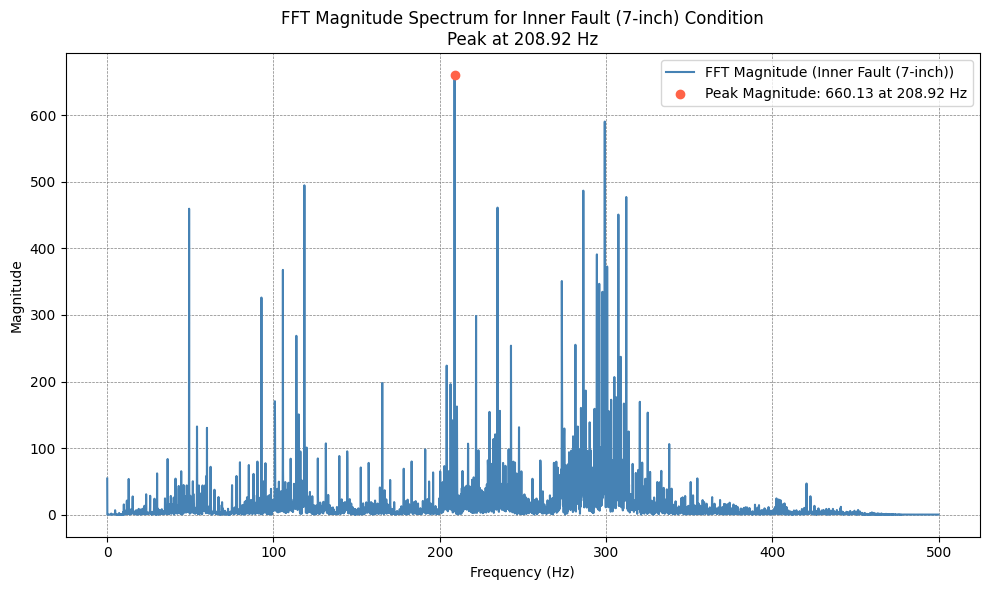

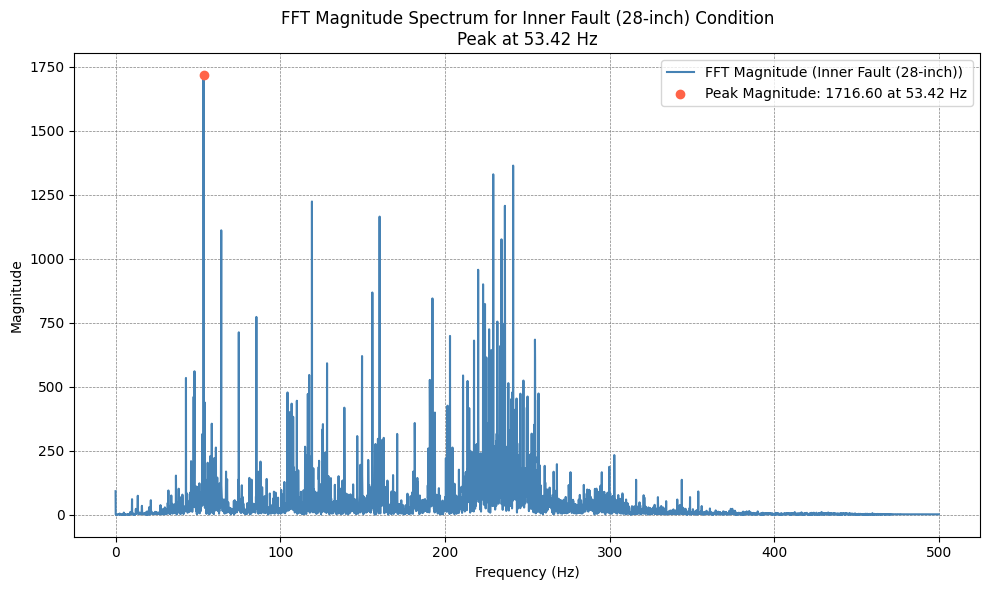

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate frequency-domain (FFT) features
def calculate_fft_features(data, sampling_rate=1000, condition_label="Unknown"):
    n = len(data)
    fft_result = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_magnitude = np.abs(fft_result)

    positive_freq = fft_freq[:n//2]
    positive_magnitude = fft_magnitude[:n//2]

    # Find the peak magnitude and corresponding frequency
    peak_index = np.argmax(positive_magnitude)
    peak_freq = positive_freq[peak_index]
    peak_magnitude = positive_magnitude[peak_index]

    # Plot the FFT magnitude with dark sky blue color
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freq, positive_magnitude, color='#4682B4', label=f'FFT Magnitude ({condition_label})')  # Dark Sky Blue
    plt.scatter(peak_freq, peak_magnitude, color='#FF6347', zorder=5, label=f'Peak Magnitude: {peak_magnitude:.2f} at {peak_freq:.2f} Hz')  # Light Red for Peak
    plt.title(f"FFT Magnitude Spectrum for {condition_label} Condition\nPeak at {peak_freq:.2f} Hz")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Lighter grid lines for contrast
    plt.tight_layout()
    plt.show()

# Define condition files and labels
condition_files = {
    "Healthy (3kw)": "Healthy_3_0.xlsx",
    "Ball Fault (7-inch)": "BallFault_0007.xlsx",
    "Ball Fault (28-inch)": "Ballfault_00028.xlsx",
    "Inner Fault (7-inch)": "Innerfault_0007.xlsx",
    "Inner Fault (28-inch)": "Innerfault_00028.xlsx"
}

# Process each file and extract features for one column (for visualization)
for condition, file_name in condition_files.items():
    # Load the file
    df = pd.read_excel(file_name)

    # Drop rows with missing values
    df_cleaned = df.dropna()

    # Choose the first column for simplicity (can choose any specific column)
    column = df_cleaned.columns[0]
    sensor_data = df_cleaned[column]

    # Calculate and plot FFT features
    calculate_fft_features(sensor_data, condition_label=condition)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import os

# Define the directory paths for each condition and their subdirectories (0kw, 3kw)
directories = {
    'Healthy_0kw': 'extracted_features/0kw',
    'ball fault0007_0kw': 'extracted_features_1/0kw',
    'ball_fault00028_0kw': 'extracted_features_2/0kw',
    'Inner race_0007_0kw': 'extracted_features_3/0kw',
    'Inner race00028_0kw': 'extracted_features_4/0kw',
    'Healthy_3kw': 'extracted_features/3kw',
    'ball fault0007_3kw': 'extracted_features_1/3kw',
    'ball_fault00028_3kw': 'extracted_features_2/3kw',
    'Inner race_0007_3kw': 'extracted_features_3/3kw',
    'Inner race00028_3kw': 'extracted_features_4/3kw'
}

# Function to load features from CSV files within a directory
def load_features_from_directory(directory, label=None):
    features = []
    labels = []
    file_names = []

    # Check if the directory exists
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return pd.DataFrame(), []

    # Iterate through each CSV file in the directory
    for file_name in sorted(os.listdir(directory)):  # Ensure sorted order
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_csv(file_path)

            # Extract feature columns (assuming 'column' is not a feature)
            feature_columns = df.columns.difference(['column'])
            features_df = df[feature_columns]

            # Append features
            features.append(features_df)
            file_names.append(file_name)
            if label is not None:
                labels.extend([label] * len(df))  # Replicate label for each row

    # Check if features were found
    if not features:
        print(f"No CSV files found in {directory}.")

    # Concatenate all feature data into a single DataFrame
    if features:
        all_features = pd.concat(features, axis=0, ignore_index=True)
    else:
        all_features = pd.DataFrame()

    if label is not None:
        return all_features, labels
    return all_features, file_names

# Load all features and labels from each directory
all_features_list = []
all_labels = []

for label, directory in directories.items():
    print(f"Loading features from {directory}...")
    features, labels = load_features_from_directory(directory, label)

    if not features.empty:
        all_features_list.append(features)
        all_labels.extend(labels)
    else:
        print(f"Skipping {directory} as it has no features.")

# Check if any features were loaded
if not all_features_list:
    print("No features were loaded from any directory. Exiting.")
    exit()

# Combine all features and labels into a single DataFrame
X_train = pd.concat(all_features_list, axis=0, ignore_index=True)
y_train = np.array(all_labels)
print(X_train)
print(y_train)

# Split into train and validation sets (80% train, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model (RandomForestClassifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val_split)

# Print classification report and accuracy score
print("Classification Report on Validation Data:")
print(classification_report(y_val_split, y_val_pred))
print("Accuracy on Validation Data:", accuracy_score(y_val_split, y_val_pred))

# Now load the testing data from the directory (extracted_features_test_2)
testing_directories = {
    'Healthy_test_0kw': 'extracted_features_test/0kw',

    'Healthy_test_3kw': 'extracted_features_test/3kw',

}

# Load all testing features in sorted order from both 0kw and 3kw subdirectories
X_test_list = []
file_names_test = []

for directory in testing_directories.values():
    print(f"Loading features from {directory}...")
    features, file_names = load_features_from_directory(directory)

    if not features.empty:
        X_test_list.append(features)
        file_names_test.extend(file_names)
    else:
        print(f"Skipping {directory} as it has no features.")

# Check if any test features were loaded
if not X_test_list:
    print("No features were loaded from the test directories. Exiting.")
    exit()

# Combine all test features into a single DataFrame
X_test = pd.concat(X_test_list, axis=0, ignore_index=True)

# Make predictions on the testing data
y_test_pred = clf.predict(X_test)

# Save the predictions for each file in the same order
output_file = 'predicted_labels_testing_data.csv'

# Create a DataFrame with the predictions
df_predictions = pd.DataFrame({
    'File': file_names_test,  # Files are mapped directly to predictions
    'Predicted_Label': y_test_pred
})

# Save predictions to a CSV file
df_predictions.to_csv(output_file, index=False)
print(f"Predictions for the testing data saved to: {output_file}")

# Save X_train and y_train to separate CSV files
x_train_file = 'X_train.csv'
y_train_file = 'y_train.csv'

# Save X_train
X_train.to_csv(x_train_file, index=False)
print(f"X_train saved to {x_train_file}")

# Save y_train
pd.DataFrame(y_train, columns=['Label']).to_csv(y_train_file, index=False)
print(f"y_train saved to {y_train_file}")

# Print dimensions of the datasets
print(f"Dimensions of X_train: {X_train.shape}")  # Rows and columns
print(f"Dimensions of y_train: {len(y_train)}")  # Number of labels



Loading features from extracted_features/0kw...
Loading features from extracted_features_1/0kw...
Loading features from extracted_features_2/0kw...
Loading features from extracted_features_3/0kw...
Loading features from extracted_features_4/0kw...
Loading features from extracted_features/3kw...
Loading features from extracted_features_1/3kw...
Loading features from extracted_features_2/3kw...
Loading features from extracted_features_3/3kw...
Loading features from extracted_features_4/3kw...
    average_magnitude  dominant_freq  kurtosis      mean  peak_magnitude  \
0            2.133340      86.333333 -0.130331  0.011621      362.175305   
1            2.178522      86.333333 -0.269274  0.011945      353.739501   
2            2.123466      86.333333 -0.270143  0.010430      360.187123   
3            2.086532      86.333333 -0.170274  0.013104      359.184710   
4            2.133319      86.333333 -0.123650  0.013088      355.301759   
..                ...            ...       ...  

In [ ]:
import pandas as pd

# Path to the Excel file
file_path = "predicted_labels_testing_data.csv"  # Replace with your file path

# Load the Excel file
data = pd.read_csv(file_path)

# Sort rows alphabetically based on the first column
sorted_data = data.sort_values(by=data.columns[0])  # Sort by the first column

# Save the sorted data back to an Excel file
output_path = "sorted_predicted_labels_testing_data.csv"
sorted_data.to_csv(output_path, index=False)

print(f"File sorted and saved as {output_path}")


File sorted and saved as sorted_predicted_labels_testing_data.csv


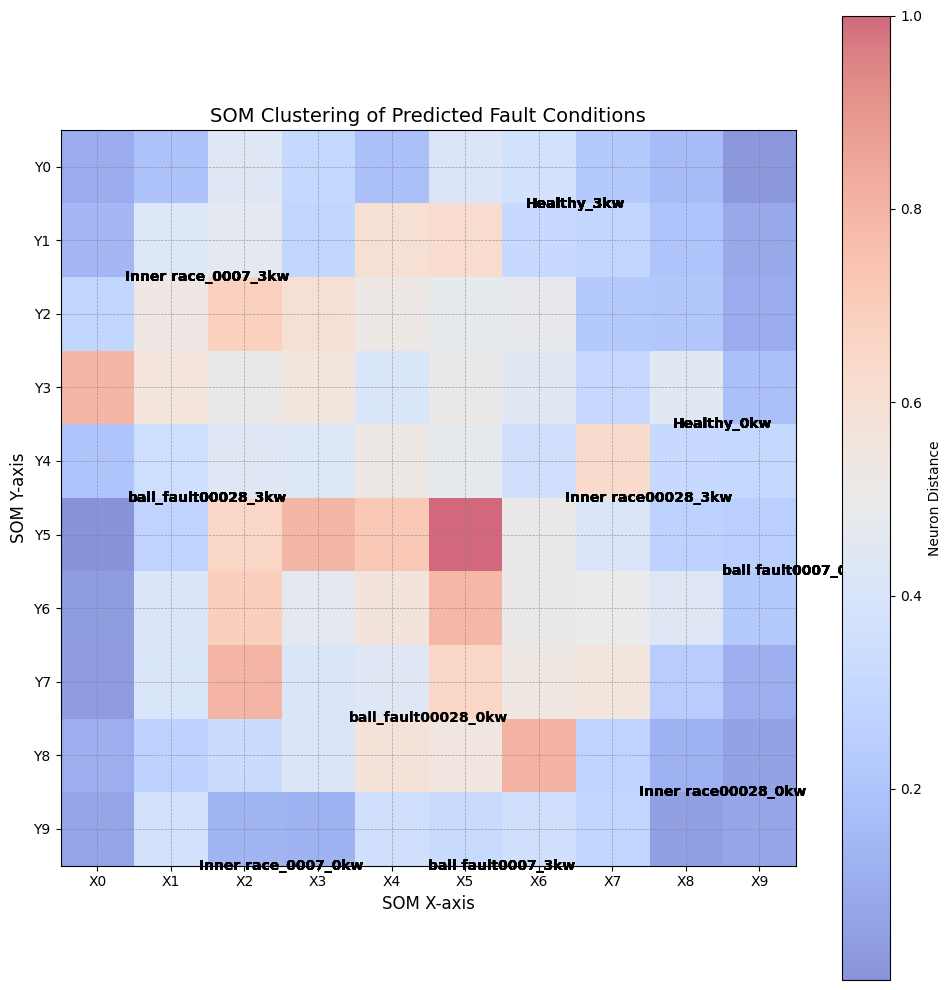

Mapped fault conditions saved to SOM_mapped_fault_conditions.csv.


In [ ]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the predicted fault conditions
# Assuming the predicted conditions are in a CSV file
predicted_data = pd.read_csv("sorted_predicted_labels_testing_data.csv")

# Extract predicted fault labels
fault_conditions = predicted_data['Predicted_Label']

# Convert fault conditions to numerical format using LabelEncoder
label_encoder = LabelEncoder()
fault_labels = label_encoder.fit_transform(fault_conditions)

# Step 2: Initialize and train the SOM
# Define SOM grid size
som_size = (10, 10)  # 10x10 grid
som = MiniSom(x=som_size[0], y=som_size[1], input_len=1, sigma=1.0, learning_rate=0.5)

# Reshape fault labels into 2D format for SOM input
fault_labels_reshaped = fault_labels.reshape(-1, 1)

# Initialize weights and train the SOM
som.random_weights_init(fault_labels_reshaped)
som.train_random(fault_labels_reshaped, num_iteration=200)  # Increase iterations for stability

# Step 3: Visualize the SOM
plt.figure(figsize=(10, 10))
plt.title("SOM Clustering of Predicted Fault Conditions", fontsize=14)

# Plot the U-Matrix for distance visualization
u_matrix = som.distance_map()
plt.imshow(u_matrix, cmap='coolwarm', interpolation='nearest', alpha=0.6)
plt.colorbar(label='Neuron Distance')

# Annotate the SOM with fault condition labels
for i, label in enumerate(fault_labels):
    x, y = som.winner([fault_labels[i]])  # Find the Best Matching Unit (BMU) for each label
    plt.text(x + 0.5, y + 0.5, str(label_encoder.inverse_transform([label])[0]),
             fontsize=10, ha='center', va='center', color='black', weight='bold')

# Add gridlines and axis labels
plt.xticks(range(som_size[0]), [f"X{i}" for i in range(som_size[0])], fontsize=10)
plt.yticks(range(som_size[1]), [f"Y{i}" for i in range(som_size[1])], fontsize=10)
plt.xlabel("SOM X-axis", fontsize=12)
plt.ylabel("SOM Y-axis", fontsize=12)
plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Display the SOM
plt.show()

# Step 4: Save the SOM mapping (Optional)
mapped_conditions = [som.winner([label]) for label in fault_labels]
predicted_data['SOM_Node'] = mapped_conditions
predicted_data.to_csv("SOM_mapped_fault_conditions.csv", index=False)
print("Mapped fault conditions saved to SOM_mapped_fault_conditions.csv.")


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=34b1b230673bb00af6ed2c4c9a6675abb5246a1769b461a6c5629ce65f90c337
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


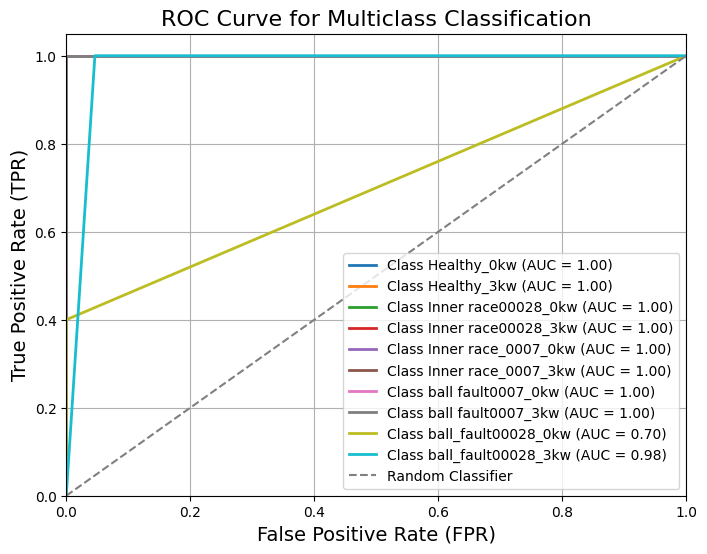

Macro-average AUC: 0.97


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Load the predicted labels and actual labels
predicted_data = pd.read_csv("sorted_predicted_labels_testing_data.csv")
actual_data = pd.read_excel("actual.xlsx")  # Adjust to your actual labels file

# Extract the predicted and actual labels
predicted_labels = predicted_data['Predicted_Label']
actual_labels = actual_data[' actual_labels']  # Ensure correct column name for actual labels

# Encode the labels
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(actual_labels)
y_pred = label_encoder.transform(predicted_labels)

# Binarize the labels for multiclass ROC (one-vs-rest approach)
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_pred))

# Number of classes
n_classes = y_true_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

# Plot each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for Multiclass Classification', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optionally, calculate the overall AUC for the multiclass case (macro-average)
macro_auc = roc_auc_score(y_true_bin, y_pred_bin, average='macro', multi_class='ovr')
print(f"Macro-average AUC: {macro_auc:.2f}")


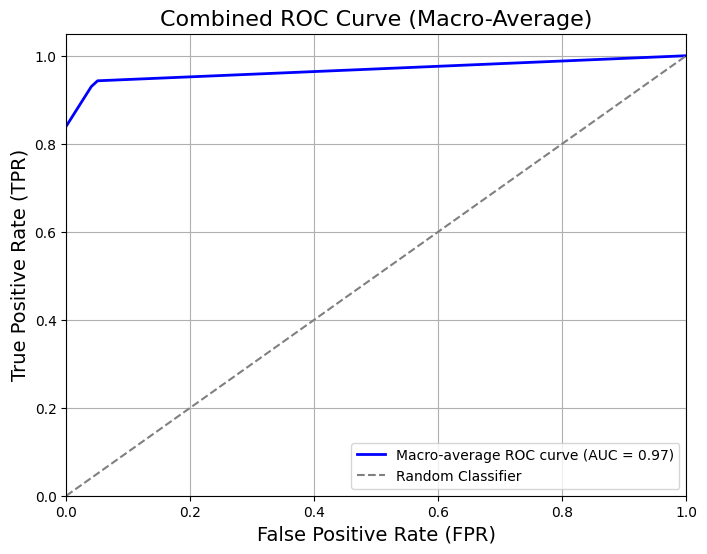

Macro-average AUC: 0.97


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Load the predicted labels and actual labels
predicted_data = pd.read_csv("sorted_predicted_labels_testing_data.csv")
actual_data = pd.read_excel("actual.xlsx")  # Adjust to your actual labels file

# Extract the predicted and actual labels
predicted_labels = predicted_data['Predicted_Label']
actual_labels = actual_data[' actual_labels']  # Ensure correct column name for actual labels

# Encode the labels
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(actual_labels)
y_pred = label_encoder.transform(predicted_labels)

# Binarize the labels for multiclass ROC (one-vs-rest approach)
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_pred))

# Number of classes
n_classes = y_true_bin.shape[1]

# Initialize arrays for combining FPR, TPR values across all classes
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

# Calculate ROC curve and AUC for each class and combine them
roc_auc = 0
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc += auc(fpr, tpr)

    # Interpolate TPR for each class at the common FPR grid
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

# Average the combined TPR and compute the final AUC
mean_tpr /= n_classes
macro_auc = roc_auc / n_classes

# Plot the combined ROC curve (macro-average)
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label=f'Macro-average ROC curve (AUC = {macro_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Combined ROC Curve (Macro-Average)', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the final macro-average AUC
print(f"Macro-average AUC: {macro_auc:.2f}")


F1 Score: 0.9529
Accuracy: 0.9571
Precision: 0.9732
Recall: 0.9571
Classification Report:
                      precision    recall  f1-score   support

        Healthy_0kw       1.00      1.00      1.00        10
        Healthy_3kw       1.00      1.00      1.00        20
Inner race00028_0kw       1.00      1.00      1.00         5
Inner race00028_3kw       1.00      1.00      1.00         5
Inner race_0007_0kw       1.00      1.00      1.00         5
Inner race_0007_3kw       1.00      1.00      1.00         5
 ball fault0007_0kw       1.00      1.00      1.00         5
 ball fault0007_3kw       1.00      1.00      1.00         5
ball_fault00028_0kw       1.00      0.40      0.57         5
ball_fault00028_3kw       0.62      1.00      0.77         5

           accuracy                           0.96        70
          macro avg       0.96      0.94      0.93        70
       weighted avg       0.97      0.96      0.95        70

Confusion Matrix:
 [[10  0  0  0  0  0  0  0  0  0]


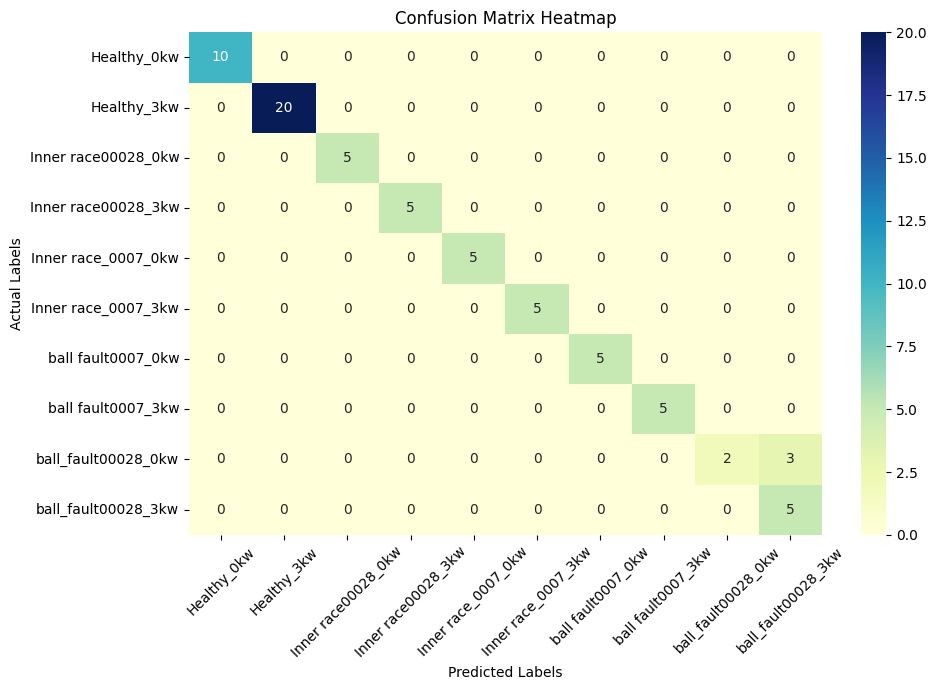

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load the predicted and actual data
predicted_path = "sorted_predicted_labels_testing_data.csv"  # Update the path
actual_path = "actual.xlsx"  # Update the path

# Load the predicted labels
predicted_data = pd.read_csv(predicted_path)
predicted_labels = predicted_data['Predicted_Label'].tolist()

# Load the actual labels from the Excel file
actual_data = pd.read_excel(actual_path)
# Adjust the column name if necessary
actual_labels = actual_data[' actual_labels'].tolist()

# Calculate and print the F1 score
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculate and print the accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision and recall
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Get unique labels and sort them alphabetically
all_labels = sorted(set(actual_labels) | set(predicted_labels))

# Calculate confusion matrix with consistent label order
matrix = confusion_matrix(actual_labels, predicted_labels, labels=all_labels)

# Generate and print classification report
report = classification_report(actual_labels, predicted_labels, labels=all_labels)
print("Classification Report:\n", report)

# Print the corrected confusion matrix
print("Confusion Matrix:\n", matrix)

# Plot heatmap of confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=all_labels, yticklabels=all_labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
